<a href="https://colab.research.google.com/github/cesartiago/youtube-educational-trends-deepseek/blob/main/GITHUB_PUB_de_youtube_api.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## Baixar sempre os arquivos

In [ ]:
#!pip install google-api-python-client pandas

In [ ]:
## BUSCAR VÍDEOS NO YOUTUBE

import os
import json
import pandas as pd
from googleapiclient.discovery import build
from datetime import datetime
import pytz

# Configuração da API do YouTube
API_KEY = "SUA_CHAVE_AQUI"  #Chave da API do YouTube. https://developers.google.com/youtube/v3?hl=pt-br
youtube = build("youtube", "v3", developerKey=API_KEY)

# 🕒 Gerar timestamp para nome dos arquivos
brasilia_tz = pytz.timezone("America/Sao_Paulo")
timestamp = datetime.now(brasilia_tz).strftime("%d-%m-%Y_%Hh%Mm")

# Termos de pesquisa
search_terms = [
    "matemática", "física", "educação física", "ciências", "biologia", "química",
    "programação", "língua Portuguesa", "história", "geografia", "filosofia",
    "sociologia", "lingua inglesa", "lingua espanhola"
]

# Canais para pesquisa direta
popular_channels = {
    "Pedro Loss": "UC6nbz99qNlGq38QjxdvnIJg",
    "Manual do Mundo": "UCXnQW3g-H5UeGt4O1DgaruQ",
    "Ciência Todo Dia": "UC7RljgfFlrKWhHMWn_JPs5g",
    "Veritasium": "UCHnyfMqiRRG1u-2MsSQLbXA",
    "Canal do Schwarza": "UCSZwD4KbkyuX9m9rU0t_dVA",
    "TecMundo": "UCLuAOSGObKAjmc4EirxPStg",
    "Nerdologia": "UCt8jaFAVU8eCR2vBtfXTM-A",
    "VSAUCE": "UC6nSFpj9HTCZ5t-N3Rm3-HA",
    "Space Today": "UC_Fk7hHbl7vv_7K8tYqJd5A"
}

# Função para buscar vídeos por palavra-chave (no máximo 50 resultados)
def search_videos_by_keywords(query, max_results=50):
    request = youtube.search().list(
        q=query,
        part="snippet",
        type="video",
        maxResults=max_results,
        order="viewCount"  # Ordenado pelos mais visualizados
    )
    return request.execute()

# Função para buscar vídeos dos canais populares
def search_videos_by_channel(channel_id, max_results=50):
    request = youtube.search().list(
        channelId=channel_id,
        part="snippet",
        type="video",
        maxResults=max_results,
        order="viewCount"
    )
    return request.execute()

# Função para extrair detalhes do vídeo
def get_video_details(video_id):
    request = youtube.videos().list(
        part="snippet,statistics",
        id=video_id
    )
    response = request.execute()

    if "items" in response and len(response["items"]) > 0:
        item = response["items"][0]
        video_url = f"https://www.youtube.com/watch?v={video_id}"  # Link do vídeo
        return {
            "id": video_id,
            "title": item["snippet"]["title"],
            "views": item["statistics"].get("viewCount", 0),
            "likes": item["statistics"].get("likeCount", 0),
            "published_at": item["snippet"]["publishedAt"],
            "channel": item["snippet"]["channelTitle"],
            "channel_id": item["snippet"]["channelId"],
            "video_url": video_url  # Incluindo o link
        }
    return None

# Coletar vídeos
all_videos = []

# Buscar vídeos por palavras-chave
for term in search_terms:
    print(f"🔍 Buscando vídeos sobre: {term}")
    search_results = search_videos_by_keywords(term)
    for item in search_results.get("items", []):
        video_id = item["id"]["videoId"]
        details = get_video_details(video_id)
        if details:
            all_videos.append(details)

# Buscar vídeos por canais específicos
for channel_name, channel_id in popular_channels.items():
    print(f"📺 Buscando vídeos do canal: {channel_name}")
    search_results = search_videos_by_channel(channel_id)
    for item in search_results.get("items", []):
        video_id = item["id"]["videoId"]
        details = get_video_details(video_id)
        if details:
            all_videos.append(details)

# Criar DataFrame do Pandas
df = pd.DataFrame(all_videos)

# Salvar em CSV
csv_filename = f"youtube_videos_{timestamp}.csv"
df.to_csv(csv_filename, index=False, encoding="utf-8")
print(f"✅ Dados salvos em {csv_filename}")

# Salvar em JSON
json_filename = f"youtube_videos_{timestamp}.json"
with open(json_filename, "w", encoding="utf-8") as f:
    json.dump(all_videos, f, indent=4, ensure_ascii=False)
print(f"✅ Dados salvos em {json_filename}")

🔍 Buscando vídeos sobre: matemática
🔍 Buscando vídeos sobre: física
🔍 Buscando vídeos sobre: educação física
🔍 Buscando vídeos sobre: ciências
🔍 Buscando vídeos sobre: biologia
🔍 Buscando vídeos sobre: química
🔍 Buscando vídeos sobre: programação
🔍 Buscando vídeos sobre: língua Portuguesa
🔍 Buscando vídeos sobre: história
🔍 Buscando vídeos sobre: geografia
🔍 Buscando vídeos sobre: filosofia
🔍 Buscando vídeos sobre: sociologia
🔍 Buscando vídeos sobre: lingua inglesa
🔍 Buscando vídeos sobre: lingua espanhola
📺 Buscando vídeos do canal: Pedro Loss
📺 Buscando vídeos do canal: Manual do Mundo
📺 Buscando vídeos do canal: Ciência Todo Dia
📺 Buscando vídeos do canal: Veritasium
📺 Buscando vídeos do canal: Canal do Schwarza
📺 Buscando vídeos do canal: TecMundo
📺 Buscando vídeos do canal: Nerdologia
📺 Buscando vídeos do canal: VSAUCE
📺 Buscando vídeos do canal: Space Today
✅ Dados salvos em youtube_videos_06-03-2025_23h55m.csv
✅ Dados salvos em youtube_videos_06-03-2025_23h55m.json


<ipython-input-1-1e76419457cf>:70: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1-1e76419457cf>:70: UserWarning: Glyph 128995 (\N{LARGE PURPLE CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1-1e76419457cf>:70: UserWarning: Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128995 (\N{LARGE PURPLE CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from font(s) DejaVu Sans.
  fig.

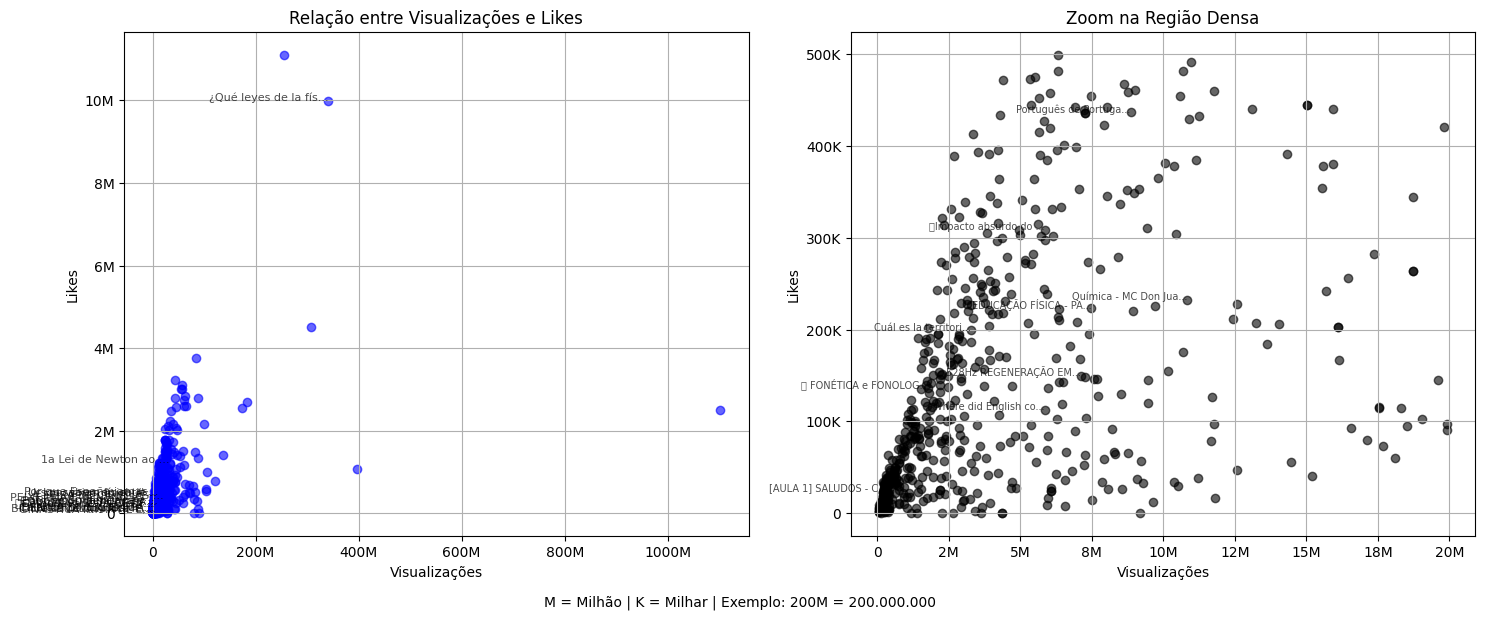

In [ ]:
## GRÁFICO USADO

import json
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Carregar os dados JSON
json_filename = "youtube_videos_04-03-2025_10h36m.json"  # Substitua pelo seu arquivo JSON gerado
with open(json_filename, "r", encoding="utf-8") as f:
    all_videos = json.load(f)

# Criar DataFrame do Pandas
df = pd.DataFrame(all_videos)

# Converter as colunas 'views' e 'likes' para valores numéricos
df['views'] = pd.to_numeric(df['views'], errors='coerce')
df['likes'] = pd.to_numeric(df['likes'], errors='coerce')

# Função para formatar os eixos (abreviação)
def format_large_numbers(value, pos):
    if value >= 1_000_000:
        return f'{value/1_000_000:.0f}M'  # Exemplo: 200M
    elif value >= 1_000:
        return f'{value/1_000:.0f}K'  # Exemplo: 500K
    return f'{value:.0f}'

# Criar figura com dois subgráficos
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# --- Gráfico principal (todos os dados) ---
axes[0].scatter(df['views'], df['likes'], alpha=0.6, color='blue')
axes[0].set_title('Relação entre Visualizações e Likes')
axes[0].set_xlabel('Visualizações')
axes[0].set_ylabel('Likes')
axes[0].grid(True)
axes[0].xaxis.set_major_formatter(ticker.FuncFormatter(format_large_numbers))
axes[0].yaxis.set_major_formatter(ticker.FuncFormatter(format_large_numbers))

# Destacar títulos apenas de alguns pontos no gráfico principal
selected_videos = df.sample(n=20)  # Pegando 20 vídeos aleatórios
displayed_labels = []
for _, row in selected_videos.iterrows():
    overlap = any(abs(row['views'] - x) < 1e6 and abs(row['likes'] - y) < 50_000 for x, y in displayed_labels)
    if not overlap:
        axes[0].text(row['views'], row['likes'], f"{row['title'][:20]}...", fontsize=8, ha='right', alpha=0.7)
        displayed_labels.append((row['views'], row['likes']))

# --- Gráfico de zoom na região densa ---
df_zoom = df[(df['views'] < 20_000_000) & (df['likes'] < 500_000)]
axes[1].scatter(df_zoom['views'], df_zoom['likes'], alpha=0.6, color='black')
axes[1].set_title('Zoom na Região Densa')
axes[1].set_xlabel('Visualizações')
axes[1].set_ylabel('Likes')
axes[1].grid(True)
axes[1].xaxis.set_major_formatter(ticker.FuncFormatter(format_large_numbers))
axes[1].yaxis.set_major_formatter(ticker.FuncFormatter(format_large_numbers))

# Exibir alguns títulos no gráfico de zoom (evitando sobreposição)
displayed_labels = []
for _, row in df_zoom.sample(n=20).iterrows():  # Pegando 20 aleatórios na região densa
    overlap = any(abs(row['views'] - x) < 1e6 and abs(row['likes'] - y) < 50_000 for x, y in displayed_labels)
    if not overlap:
        axes[1].text(row['views'], row['likes'], f"{row['title'][:20]}...", fontsize=7, ha='right', alpha=0.7)
        displayed_labels.append((row['views'], row['likes']))

# Adicionar legenda explicativa
fig.text(0.5, -0.02, "M = Milhão | K = Milhar | Exemplo: 200M = 200.000.000", ha='center', fontsize=10)

plt.tight_layout()
plt.show()


In [ ]:
## ANALISANDO DADOS PELA DeepSeek (via OpenRouter)

import os
import json
import requests
import pandas as pd
from datetime import datetime
import pytz

# 🚀 CONFIGURAÇÃO DA API
OPENROUTER_API_KEY = "SUA_CHAVE_AQUI"  # Substitua pela sua chave da OpenRouter. https://openrouter.ai/deepseek/deepseek-r1:free

# 🕒 Gerar timestamp para nome dos arquivos
brasilia_tz = pytz.timezone("America/Sao_Paulo")
timestamp = datetime.now(brasilia_tz).strftime("%d-%m-%Y_%Hh%Mm")

# 📂 Nome esperado do arquivo JSON do YouTube
##youtube_json_filename = f"youtube_videos(17-02-2025_001).json"
youtube_json_filename = f"youtube_videos_06-03-2025_23h55m.json"

# 📝 Verificar se o arquivo existe
if not os.path.exists(youtube_json_filename):
    print(f"❌ Arquivo não encontrado: '{youtube_json_filename}'.")
    print("📄 Por favor, forneça o nome do arquivo correto com data e hora.")
    exit()

# 🚀 CARREGANDO OS DADOS DO YOUTUBE (JSON)
with open(youtube_json_filename, "r", encoding="utf-8") as f:
    video_data = json.load(f)

# 📊 TRANSFORMAR EM DATAFRAME (OPCIONAL, PARA VISUALIZAR MELHOR)
df = pd.DataFrame(video_data)

# 🚀 FORMATANDO OS DADOS PARA A IA
mensagem_ia = "Aqui estão os vídeos educativos mais famosos:\n\n"

for _, row in df.iterrows():
    mensagem_ia += f"🔹 {row['title']} - {row['views']} views - {row['likes']} likes\n"

mensagem_ia += "\nBaseado nesses vídeos, quais são os melhores insights para criar novos conteúdos educativos? Quais padrões podemos identificar? Quais temas parecem ter maior sucesso?"

# 🚀 CHAMANDO A API DA IA
url = "https://openrouter.ai/api/v1/chat/completions"
headers = {
    "Authorization": f"Bearer {OPENROUTER_API_KEY}",
    "Content-Type": "application/json"
}
payload = json.dumps({
    "model": "deepseek/deepseek-r1:free",
    "messages": [
        {"role": "system", "content": "Você é um especialista em análise de vídeos educativos."},
        {"role": "user", "content": mensagem_ia}
    ]
})

response = requests.post(url, headers=headers, data=payload)

# ✅ VERIFICANDO SE A API RETORNOU ERRO
if response.status_code != 200:
    print("❌ Erro na requisição:", response.status_code)
    print("📄 Resposta da API:", response.text)
    exit()

# ✅ VERIFICANDO SE 'choices' EXISTE NA RESPOSTA
resposta_ia = response.json()
if "choices" in resposta_ia and len(resposta_ia["choices"]) > 0:
    insights = resposta_ia["choices"][0]["message"]["content"]

    # 📂 Nome do arquivo de insights com data e referência ao JSON analisado
    insights_filename = f"ANALISE_IA_DSR1_{timestamp}_DE_({youtube_json_filename})"

    # 📝 SALVANDO OS INSIGHTS EM UM TXT
    with open(f"{insights_filename}.txt", "w", encoding="utf-8") as txt_file:
        txt_file.write(insights)

    # 💾 SALVANDO OS INSIGHTS EM UM JSON
    with open(f"{insights_filename}.json", "w", encoding="utf-8") as json_file:
        json.dump({"insights": insights}, json_file, ensure_ascii=False, indent=4)

    print("\n📊 **INSIGHTS DA IA:**\n")
    print(insights)
    print(f"\n✅ Insights salvos em '{insights_filename}.txt' e '{insights_filename}.json'!")
else:
    print("❌ Resposta inesperada da IA:", resposta_ia)


📊 **INSIGHTS DA IA:**



✅ Insights salvos em 'ANALISE_IA_DSR1_07-03-2025_00h33m_DE_(youtube_videos_06-03-2025_23h55m.json).txt' e 'ANALISE_IA_DSR1_07-03-2025_00h33m_DE_(youtube_videos_06-03-2025_23h55m.json).json'!
